# Advertisement CTR Prediction

The Advertisement CTR Prediction challenge is to predict the Click-Through Rate (CTR) for advertisements using the dataset [2020-digix-advertisement-ctr-prediction](https://www.kaggle.com/datasets/louischen7/2020-digix-advertisement-ctr-prediction).

The goal of this Jupyter Notebook is to build and evaluate differents Machine Learning Models for the Click-Through Rate Prediction. 

In [1]:
# Append local development on system path
import sys
sys.path.append('../../')

# Data Manipulation
from src.data.build_data import load_data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from src.model.build_model import make_pipeline
from lightgbm import LGBMClassifier

/home/rsoares/anaconda3/envs/ai_collaborator_ctr/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
# Load dataset

In [2]:
dataset_path = '../../data/processed/eda_train_data.csv'
chunk_size = 100_000

In [3]:
dataset_df = load_data(dataset_path, chunk_size=chunk_size)

9it [00:37,  4.16s/it]


In [4]:
dataset_df.shape

(833616, 898)

---
# Split dataset

As the dataset contains 833.616, I choose use `train_test_split` method for split dataset in two pieces:
* *Cross Validation Set* - A dataset used to select the best parameters for all machine learning models.
* *Blind Set* - A dataset used to measure the model performance into a simulate deployment stage.

The data is splitted using a stratified approach to maintain the probability distribution of `label` column.

The ***Blind Set*** contains 30% of the original dataset. 

In [5]:
X = dataset_df[dataset_df.columns.difference(['label'])]
y = dataset_df['label']

In [6]:
X_cross, X_blind, y_cross, y_blind = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

---
# Model Training

In this stage I will perform model training and evaluate it to predict the Click-Through Rate. 

I chose evaluate 3 machine learning models:
* Decision Tree - A base model that make decision based on simple rules inferred from data features.
* Random Forest - An ensemble of decision trees for improved prediction accuracy using randomness to avoid overfitting.
* LGBM - A gradient boosting framework that uses tree-based learning algorithms for high efficiency and handling large-scale data.

Since there is a lot of data, using a 10-fold cross-validation is a good choice to gather more results and have greater statistical confidence in the analyses

In [7]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

As the Click-Through Rate Prediction is a binary and unbalanced problem use metrics like `accuracy` is not a good idea, because the skewness of the class-label affect the evaluation process.

To avoid this kind of problem I chose the `Area Under the Curve (AUC)` metric to evaluate model's performance. The AUC takes the True Positive Rate (TPR) and False Positive Rate (FPR).
* TPR - When the model predicted an adv click and the model is correct.
* FPR - When the model predicted an adv click and the model is not correct.

### Decision Tree Model

In [8]:
decision_tree_classifier = DecisionTreeClassifier(random_state=1221)
decision_tree_pipeline = make_pipeline(decision_tree_classifier)
decision_tree_results = cross_validate(decision_tree_pipeline, X_cross, y_cross, verbose=4, cv=kfold, scoring='roc_auc')

[CV] END ......................................., score=0.519 total time=  32.0s
[CV] END ......................................., score=0.517 total time=  33.1s
[CV] END ......................................., score=0.523 total time=  33.6s
[CV] END ......................................., score=0.527 total time=  32.7s
[CV] END ......................................., score=0.525 total time=  33.0s
[CV] END ......................................., score=0.521 total time=  33.1s
[CV] END ......................................., score=0.523 total time=  32.7s
[CV] END ......................................., score=0.516 total time=  33.3s
[CV] END ......................................., score=0.524 total time=  32.4s
[CV] END ......................................., score=0.526 total time=  30.8s


In [9]:
decision_tree_results_df = pd.DataFrame(decision_tree_results)
decision_tree_results_df['model'] = 'Decision Tree'

### Random Forest Model

In [10]:
random_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=1221, n_jobs=4)
random_forest_pipeline = make_pipeline(random_forest_classifier)
random_forest_results = cross_validate(random_forest_pipeline, X_cross, y_cross, verbose=4, cv=kfold, scoring='roc_auc')

[CV] END ......................................., score=0.592 total time=  20.7s
[CV] END ......................................., score=0.599 total time=  21.3s
[CV] END ......................................., score=0.579 total time=  22.5s
[CV] END ......................................., score=0.584 total time=  20.8s
[CV] END ......................................., score=0.597 total time=  20.9s
[CV] END ......................................., score=0.584 total time=  22.1s
[CV] END ......................................., score=0.590 total time=  21.1s
[CV] END ......................................., score=0.586 total time=  20.9s
[CV] END ......................................., score=0.589 total time=  22.5s
[CV] END ......................................., score=0.588 total time=  21.9s


In [11]:
random_forest_results_df = pd.DataFrame(random_forest_results)
random_forest_results_df['model'] = 'Random Forest'

### Light GBM Model

In [12]:
lgbm_classifier = LGBMClassifier(seed=1221)
lgbm_pipeline = make_pipeline(lgbm_classifier)
lgbm_results = cross_validate(lgbm_pipeline, X_cross, y_cross, verbose=4, cv=kfold, scoring='roc_auc')

[CV] END ......................................., score=0.701 total time=  27.1s
[CV] END ......................................., score=0.711 total time=  20.5s
[CV] END ......................................., score=0.706 total time=  21.0s
[CV] END ......................................., score=0.703 total time=  19.9s
[CV] END ......................................., score=0.715 total time=  20.4s
[CV] END ......................................., score=0.701 total time=  20.1s
[CV] END ......................................., score=0.705 total time=  20.8s
[CV] END ......................................., score=0.710 total time=  21.4s
[CV] END ......................................., score=0.705 total time=  20.1s
[CV] END ......................................., score=0.704 total time=  20.0s


In [13]:
lgbm_results_df = pd.DataFrame(lgbm_results)
lgbm_results_df['model'] = 'Light GBM'

# Comparing model performance

As we can see below, the LGBM model achieve better results. In average, LGBM achieve 70% of AUC. The result is almost 12% better than Random Forest and almost 18% better than Decision Tree.

Observation:
* In the evaluation I use the same number os estimators in Random Forest and LGBM.
* The results are achieved using the default hyperparameters of each model.
* I did not use hyperparameter optimization approach. Those methods have a huge time cost and I did avoid that in this stage.

**Tip💡**: To achieve better results one approach is use a hyperparameter optimization like **Bayesian Optimization**.

In [14]:
model_results_df = pd.concat([decision_tree_results_df, random_forest_results_df, lgbm_results_df])

In [15]:
model_results_df.groupby('model')['test_score'].agg(['mean', 'std'])

,mean,std
model,,
Decision Tree,0.522116,0.003842
Light GBM,0.706060,0.004568
Random Forest,0.588752,0.006087


<Axes: title={'center': 'test_score'}, xlabel='model'>

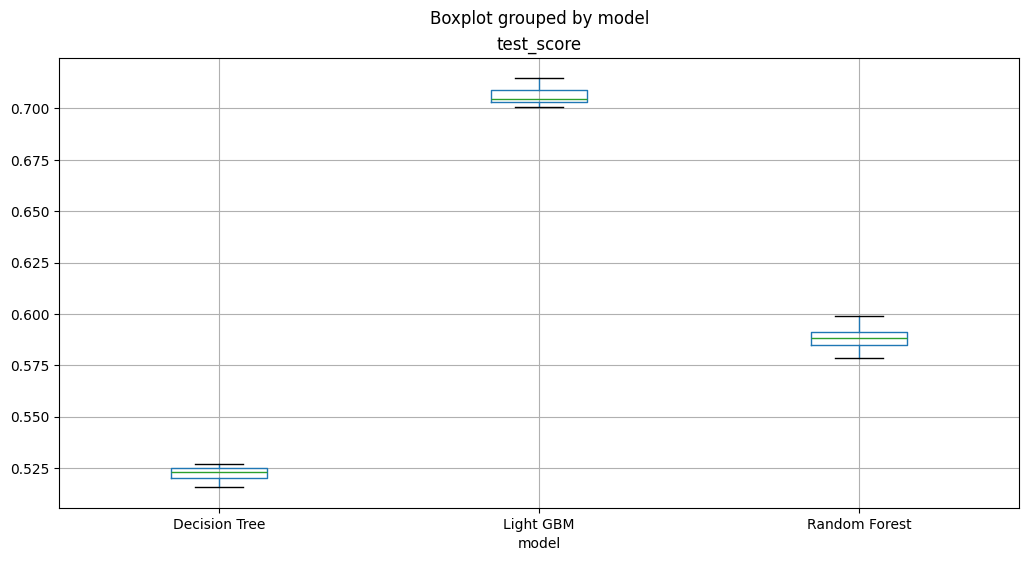

In [16]:
model_results_df.boxplot(by='model', column='test_score', figsize=(12, 6))

# Evaluate LGBM Model over Blind Set

Once the LGBM is the better model, we can measure the model performance over the `Blind Set`. To do that I will do the following steps:

1. Set the LGBM pipeline
2. Train the LGMB over the whole `Cross Validation Set`
3. Predict the `class-label` for each example in `Blind Set`
4. Measure the Model Performance using the `AUC`
5. Plot the ROC Curve and Find the Best Threshold Probability
6. Adjust prediction based on Best Threshold Probability
7. Plot the Confusion Matrix and Classification Report

### 1. Set the LGMB pipeline

In [17]:
lgbm_classifier = LGBMClassifier(seed=1221)
lgbm_pipeline = make_pipeline(lgbm_classifier)

### 2. Train the LGMB over the whole `Cross Validation Set`

In [18]:
lgbm_pipeline.fit(X_cross, y_cross)

Pipeline(steps=[('min_max', MinMaxScaler(feature_range=(0.2, 0.8))),
                ('clf', LGBMClassifier(objective='binary', seed=1221))])

### 3. Predict the `class-label` for each example in `Blind Set`

In [19]:
# The class-label
y_blind_pred = lgbm_pipeline.predict(X_blind)

# The probability of an example belongs to class 1 (user click)
y_blind_pred_score = lgbm_pipeline.predict_proba(X_blind)[:, 1]

### 4. Measure the Model Performance using the `AUC`

As we can see below, the `AUC` achieve over the `Blind Set` is very close to the `AUC` achieve over the `Cross Validation Set`

In [20]:
auc = roc_auc_score(y_blind, y_blind_pred_score)
print(f'LGBM: ROC AUC = {auc}')

LGBM: ROC AUC = 0.7060235138647305


### 5. Plot the ROC Curve and Find the Best Threshold Probability

In addition to visualizing the ROC curve, we will calculate the ideal threshold for classifying the examples of the blind set. For this, we will use the Geometric Mean. The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity, where:
* Sensitivity = True Positive Rate (TPR)
* Specificity = 1 – False Positive Rate (FPR)

In [21]:
# Calculate roc curve for LGBM
fpr, tpr, thresholds = roc_curve(y_blind, y_blind_pred_score)

In [22]:
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print(f'Best Threshold = {thresholds[ix]}, G-Mean = {gmeans[ix]}')

Best Threshold = 0.2001235091705749, G-Mean = 0.6560243733058118


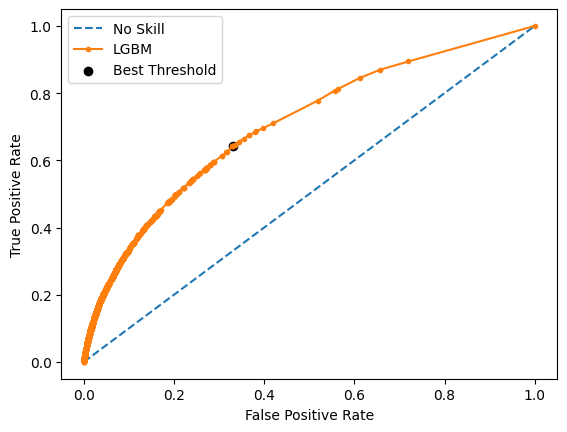

In [23]:
# Plot the ROC Curve and the best threhsold
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

### 6. Adjust prediction based on Best Threshold Probability

Based on the best threshold probability I will change the prediction of each example of `Blind Set`

In [24]:
mask = (y_blind_pred_score >= thresholds[ix])

y_blind_pred[mask] = 1
y_blind_pred[~mask] = 0

### 7. Plot the Confusion Matrix and Classification Report

Based on the confusion matrix below, we can see that the LGBM model can predict both `class-label` well. Thus, we were able to prevent the issue of data imbalance from affecting the model's prediction.

Analysing the `Classification Report`, we can see that we need improve the quality of our model to achieve a better precision and f1-score for the minority `class-label`. 

**Tip** 💡: Improving the feature engineering process and apply a hyperparameters optimization are alternatives to improve the quality of the model.

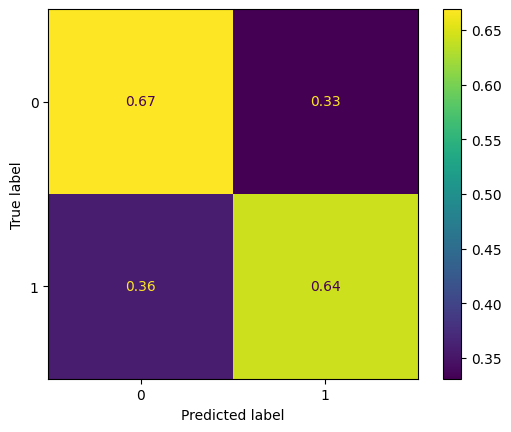

In [25]:
# Calculate the confusion matrix and plot them
cm = confusion_matrix(y_blind, y_blind_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot()

In [26]:
print(classification_report(y_blind, y_blind_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    241443
           1       0.07      0.64      0.12      8642

    accuracy                           0.67    250085
   macro avg       0.52      0.66      0.46    250085
weighted avg       0.95      0.67      0.77    250085

